# Determining Chocolate Bar Ratings Using Regression Analysis

## Index
### 0.1 Import Libraries
### 0.2 Import Data
### 0.3 Data Cleaning
### 0.4 Data Preparation
### 0.4 Regression Analysis

## 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 0.2 Import Data

In [3]:
# create shortcut path to project folder
path = r'C:\Users\chris\OneDrive\Documents\2-7-2024 Final Project'

In [24]:
# import 'flavor_cacao_clean' as dataframe
df_cacao = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','chocolate_bar_ratings_clean.csv'), index_col = 0)

In [25]:
# verify new data frame
df_cacao.head()

company company_location  review_date country_of_bean_origin  \
0    5150           U.S.A.         2019               Tanzania   
1    5150           U.S.A.         2019             Madagascar   
2    5150           U.S.A.         2019     Dominican Republic   
3    5150           U.S.A.         2021                   Fiji   
4    5150           U.S.A.         2021                  India   

  specific_bean_or_bar_origin  cocoa_percent ingredients  \
0       Kokoa Kamili, batch 1           0.76    3- B,S,C   
1      Bejofo Estate, batch 1           0.76    3- B,S,C   
2             Zorzal, batch 1           0.76    3- B,S,C   
3       Matasawalevu, batch 1           0.68    3- B,S,C   
4           Anamalai, batch 1           0.68    3- B,S,C   

  most_memorable_characteristics  rating  
0      rich cocoa, fatty, bready    3.25  
1   cocoa, blackberry, full body    3.75  
2         cocoa, vegetal, savory    3.50  
3            chewy, off, rubbery    3.00  
4  milk brownie, macadamia,chewy    3.50

In [26]:
# verify shape of data frame
df_cacao.shape

(2588, 9)

## 0.3 Data Cleaning

In [27]:
# check for missing values 
df_cacao.isnull().sum()

company                            0
company_location                   0
review_date                        0
country_of_bean_origin             0
specific_bean_or_bar_origin        0
cocoa_percent                      0
ingredients                       87
most_memorable_characteristics     0
rating                             0
dtype: int64

In [28]:
# check for duplicate columns
dups = df_cacao.duplicated()

In [47]:
dups.shape

(2588,)

In [48]:
df_cacao.drop_duplicates()

company company_location  review_date country_of_bean_origin  \
0       5150           U.S.A.         2019               Tanzania   
1       5150           U.S.A.         2019             Madagascar   
2       5150           U.S.A.         2019     Dominican Republic   
3       5150           U.S.A.         2021                   Fiji   
4       5150           U.S.A.         2021                  India   
...      ...              ...          ...                    ...   
2583  Zotter          Austria         2014                  Blend   
2584  Zotter          Austria         2017               Colombia   
2585  Zotter          Austria         2018                  Blend   
2586  Zotter          Austria         2018                  Congo   
2587  Zotter          Austria         2018                 Belize   

          specific_bean_or_bar_origin  cocoa_percent   ingredients  \
0               Kokoa Kamili, batch 1           0.76      3- B,S,C   
1              Bejofo Estate, batch 1           0.76      3- B,S,C   
2                     Zorzal, batch 1           0.76      3- B,S,C   
3               Matasawalevu, batch 1           0.68      3- B,S,C   
4                   Anamalai, batch 1           0.68      3- B,S,C   
...                               ...            ...           ...   
2583                              Raw           0.80  4- B,S*,C,Sa   
2584                 APROCAFA, Acandi           0.75      3- B,S,C   
2585  Dry Aged, 30 yr Anniversary bar           0.75      3- B,S,C   
2586            Mountains of the Moon           0.70      3- B,S,C   
2587                         Maya Mtn           0.72      3- B,S,C   

     most_memorable_characteristics  rating  
0         rich cocoa, fatty, bready    3.25  
1      cocoa, blackberry, full body    3.75  
2            cocoa, vegetal, savory    3.50  
3               chewy, off, rubbery    3.00  
4     milk brownie, macadamia,chewy    3.50  
...                             ...     ...  
2583         waxy, cloying, vegetal    2.75  
2584      strong nutty, marshmallow    3.75  
2585           fatty, earthy, cocoa    3.00  
2586   fatty, mild nuts, mild fruit    3.25  
2587      muted, roasty, accessible    3.50  

[2588 rows x 9 columns]

C:\Users\chris\AppData\Local\Temp\ipykernel_17096\4211724427.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cacao['rating'], bins=25)


<Axes: xlabel='rating', ylabel='Density'>

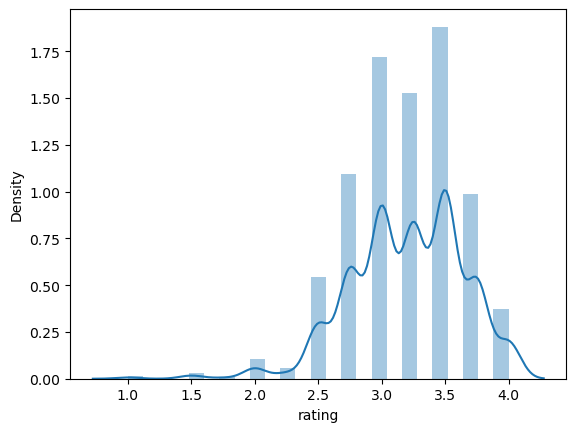

In [30]:
# check for extreme values
sns.distplot(df_cacao['rating'], bins=25) 

In [31]:
# check for mean
df_cacao['rating'].mean()

3.198319165378671

In [32]:
# check for median
df_cacao['rating'].median()

3.25

## 0.4 Data Preparation

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


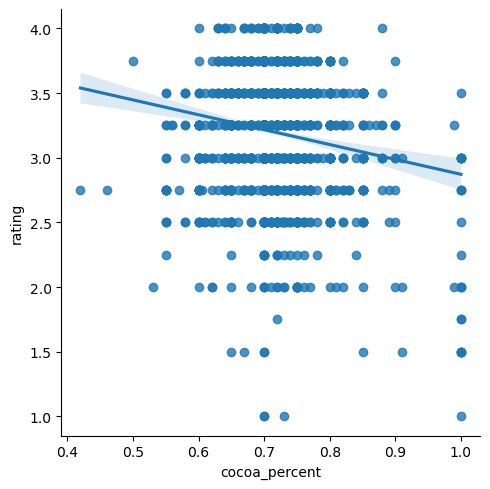

In [33]:
# Create scatterplot for 'rating' and 'cocoa_percent'
sns.lmplot(x = 'cocoa_percent', y = 'rating', data = df_cacao)

### Hypotheis 
If a chocolate bar has a high cocoa percent, then its final ranking will be low.

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cacao['cocoa_percent'].values.reshape(-1,1)
y = df_cacao['rating'].values.reshape(-1,1)

In [35]:
X

array([[0.76],
       [0.76],
       [0.76],
       ...,
       [0.75],
       [0.7 ],
       [0.72]])

In [36]:
y

array([[3.25],
       [3.75],
       [3.5 ],
       ...,
       [3.  ],
       [3.25],
       [3.5 ]])

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 0.5 Regression Analysis

In [38]:
# Create a regression object.

regression = LinearRegression()  

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

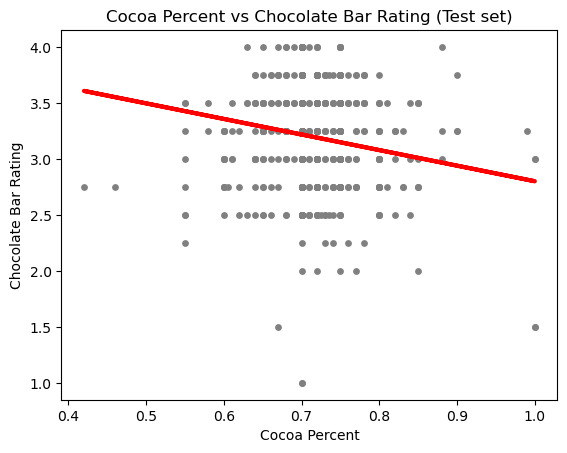

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Chocolate Bar Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Chocolate Bar Rating')
plot_test.show()

### Explanation
The above visual showcases that the regression line passes through the middle cluster of data points. This tells us that the models accuracy is flawed due to the amount of data points above the regression line with both high cocoa percent and high rating.

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [43]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.39092891]]
Mean squared error:  0.1981028090975437
R2 score:  -0.005948921215175096


In [24]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     2.50   3.135457
1     2.75   3.174855
2     2.50   3.201120
3     3.25   3.201120
4     3.25   3.069794
5     2.75   3.398108
6     3.50   3.201120
7     2.50   3.135457
8     3.50   3.253650
9     3.50   3.266783
10    2.75   3.279915
11    3.50   3.201120
12    3.00   3.266783
13    3.50   3.201120
14    3.25   3.135457
15    2.75   3.069794
16    1.50   3.004132
17    3.00   3.174855
18    2.75   3.201120
19    3.75   3.201120
20    3.00   3.201120
21    3.50   3.161722
22    2.75   3.398108
23    3.00   2.807143
24    3.00   3.332445
25    3.00   3.135457
26    3.00   3.135457
27    3.50   3.227385
28    3.00   3.201120
29    3.75   3.227385

### Final Thoughts
The model summary statistics and comparisons of predicted values with actual values confirms our initial observation that the models accuracy is low. While the model had a low MSE that indicates a good fit, its low R2 score indicates that it's not a good fit. This is further showcased comparing the predicted and actual values, which show that most of the predicted values differ greatly from the actual values. This is to be expected because of how rating is determined by human judgement based on objective criteria. Humans have many subjective tastes, and those tastes might reflect some personal bias in a chocolate bars final rating. It is not possible to prove our reseach hypothesis with just this data, or any other data due to the aspect of human bias.